In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM

import numpy as np
from random import seed
from random import randint
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [8]:
#Is GPU working?
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17078139136869246226, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 339345408
 locality {
   bus_id: 1
 }
 incarnation: 2998743109411532166
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
import numpy as np
x_train = np.random.randint(1,99,500000).reshape(5000,50,2)
y_train = np.cumsum(np.sum(x_train,axis=2),axis=1).reshape(5000,50,1)
x_test = np.random.randint(1,99,50000).reshape(500,50,2)
y_test = np.cumsum(np.sum(x_test,axis=2),axis=1).reshape(500,50,1)
x_train.shape, y_train.shape

((5000, 50, 2), (5000, 50, 1))

In [13]:
model = Sequential()  
model.add(LSTM(32, input_shape=(50,2),return_sequences=True))  
# model.add(LSTM(1, return_sequences=True, activation='linear'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])
history = model.fit(x_train, y_train, nb_epoch=200, batch_size=5000, verbose=2,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5000 samples, validate on 500 samples
Epoch 1/200
 - 1s - loss: 8452099.0000 - mean_squared_error: 8452099.0000 - val_loss: 8403992.0000 - val_mean_squared_error: 8403991.0000
Epoch 2/200
 - 0s - loss: 8451852.0000 - mean_squared_error: 8451852.0000 - val_loss: 8403709.0000 - val_mean_squared_error: 8403707.0000
Epoch 3/200
 - 0s - loss: 8451567.0000 - mean_squared_error: 8451567.0000 - val_loss: 8403409.0000 - val_mean_squared_error: 8403409.0000
Epoch 4/200
 - 0s - loss: 8451265.0000 - mean_squared_error: 8451266.0000 - val_loss: 8403102.0000 - val_mean_squared_error: 8403102.0000
Epoch 5/200
 - 0s - loss: 8450957.0000 - mean_squared_error: 8450957.0000 - val_loss: 8402777.0000 - val_mean_squared_error: 8402778.0000
Epoch 6/200
 - 0s - loss: 8450633.0000 - mean_squared_error: 8450632.0000 - val_loss: 8402459.0000 - val_mean_squared_error: 8402459.0000
Epoch 7/200
 - 0s - loss: 8450313.0000 - mean_squared_error: 8450313.0000 - val_loss: 8402152.0000 - val_mean_squared_error: 

Epoch 27/200
 - 0s - loss: 8444582.0000 - mean_squared_error: 8444582.0000 - val_loss: 8396493.0000 - val_mean_squared_error: 8396493.0000
Epoch 28/200
 - 0s - loss: 8444318.0000 - mean_squared_error: 8444318.0000 - val_loss: 8396229.0000 - val_mean_squared_error: 8396229.0000
Epoch 29/200
 - 0s - loss: 8444055.0000 - mean_squared_error: 8444055.0000 - val_loss: 8395965.0000 - val_mean_squared_error: 8395965.0000
Epoch 30/200
 - 0s - loss: 8443791.0000 - mean_squared_error: 8443792.0000 - val_loss: 8395702.0000 - val_mean_squared_error: 8395703.0000
Epoch 31/200
 - 0s - loss: 8443530.0000 - mean_squared_error: 8443529.0000 - val_loss: 8395441.0000 - val_mean_squared_error: 8395441.0000
Epoch 32/200
 - 0s - loss: 8443267.0000 - mean_squared_error: 8443268.0000 - val_loss: 8395181.0000 - val_mean_squared_error: 8395181.0000
Epoch 33/200
 - 0s - loss: 8443008.0000 - mean_squared_error: 8443008.0000 - val_loss: 8394922.0000 - val_mean_squared_error: 8394922.0000
Epoch 34/200
 - 0s - loss: 

 - 0s - loss: 8437422.0000 - mean_squared_error: 8437422.0000 - val_loss: 8389246.0000 - val_mean_squared_error: 8389245.0000
Epoch 54/200
 - 0s - loss: 8437031.0000 - mean_squared_error: 8437031.0000 - val_loss: 8388845.0000 - val_mean_squared_error: 8388845.0000
Epoch 55/200
 - 0s - loss: 8436626.0000 - mean_squared_error: 8436626.0000 - val_loss: 8388433.0000 - val_mean_squared_error: 8388433.0000
Epoch 56/200
 - 0s - loss: 8436213.0000 - mean_squared_error: 8436212.0000 - val_loss: 8388016.5000 - val_mean_squared_error: 8388017.0000
Epoch 57/200
 - 0s - loss: 8435794.0000 - mean_squared_error: 8435794.0000 - val_loss: 8387600.5000 - val_mean_squared_error: 8387600.5000
Epoch 58/200
 - 0s - loss: 8435376.0000 - mean_squared_error: 8435377.0000 - val_loss: 8387190.0000 - val_mean_squared_error: 8387190.5000
Epoch 59/200
 - 0s - loss: 8434965.0000 - mean_squared_error: 8434965.0000 - val_loss: 8386788.5000 - val_mean_squared_error: 8386788.5000
Epoch 60/200
 - 0s - loss: 8434563.0000 

 - 0s - loss: 8426974.0000 - mean_squared_error: 8426974.0000 - val_loss: 8378755.0000 - val_mean_squared_error: 8378755.5000
Epoch 80/200
 - 0s - loss: 8426527.0000 - mean_squared_error: 8426527.0000 - val_loss: 8378317.0000 - val_mean_squared_error: 8378317.0000
Epoch 81/200
 - 0s - loss: 8426085.0000 - mean_squared_error: 8426085.0000 - val_loss: 8377877.5000 - val_mean_squared_error: 8377877.0000
Epoch 82/200
 - 0s - loss: 8425642.0000 - mean_squared_error: 8425642.0000 - val_loss: 8377436.0000 - val_mean_squared_error: 8377436.5000
Epoch 83/200
 - 0s - loss: 8425198.0000 - mean_squared_error: 8425199.0000 - val_loss: 8376992.5000 - val_mean_squared_error: 8376992.5000
Epoch 84/200
 - 0s - loss: 8424754.0000 - mean_squared_error: 8424753.0000 - val_loss: 8376544.5000 - val_mean_squared_error: 8376544.0000
Epoch 85/200
 - 0s - loss: 8424304.0000 - mean_squared_error: 8424304.0000 - val_loss: 8376095.5000 - val_mean_squared_error: 8376095.0000
Epoch 86/200
 - 0s - loss: 8423855.0000 

 - 0s - loss: 8415021.0000 - mean_squared_error: 8415021.0000 - val_loss: 8366854.0000 - val_mean_squared_error: 8366854.0000
Epoch 106/200
 - 0s - loss: 8414595.0000 - mean_squared_error: 8414594.0000 - val_loss: 8366431.0000 - val_mean_squared_error: 8366431.5000
Epoch 107/200
 - 0s - loss: 8414170.0000 - mean_squared_error: 8414170.0000 - val_loss: 8366014.0000 - val_mean_squared_error: 8366014.0000
Epoch 108/200
 - 0s - loss: 8413751.0000 - mean_squared_error: 8413751.0000 - val_loss: 8365596.5000 - val_mean_squared_error: 8365597.0000
Epoch 109/200
 - 0s - loss: 8413332.0000 - mean_squared_error: 8413333.0000 - val_loss: 8365182.5000 - val_mean_squared_error: 8365183.0000
Epoch 110/200
 - 0s - loss: 8412917.0000 - mean_squared_error: 8412917.0000 - val_loss: 8364765.0000 - val_mean_squared_error: 8364764.5000
Epoch 111/200
 - 0s - loss: 8412498.0000 - mean_squared_error: 8412498.0000 - val_loss: 8364346.5000 - val_mean_squared_error: 8364346.5000
Epoch 112/200
 - 0s - loss: 841207

 - 0s - loss: 8404304.0000 - mean_squared_error: 8404303.0000 - val_loss: 8356196.5000 - val_mean_squared_error: 8356196.5000
Epoch 132/200
 - 0s - loss: 8403907.0000 - mean_squared_error: 8403908.0000 - val_loss: 8355810.5000 - val_mean_squared_error: 8355810.0000
Epoch 133/200
 - 0s - loss: 8403518.0000 - mean_squared_error: 8403519.0000 - val_loss: 8355429.5000 - val_mean_squared_error: 8355429.5000
Epoch 134/200
 - 0s - loss: 8403137.0000 - mean_squared_error: 8403136.0000 - val_loss: 8355057.0000 - val_mean_squared_error: 8355058.0000
Epoch 135/200
 - 0s - loss: 8402760.0000 - mean_squared_error: 8402761.0000 - val_loss: 8354694.0000 - val_mean_squared_error: 8354693.0000
Epoch 136/200
 - 0s - loss: 8402393.0000 - mean_squared_error: 8402393.0000 - val_loss: 8354335.0000 - val_mean_squared_error: 8354336.0000
Epoch 137/200
 - 0s - loss: 8402033.0000 - mean_squared_error: 8402033.0000 - val_loss: 8353987.0000 - val_mean_squared_error: 8353986.5000
Epoch 138/200
 - 0s - loss: 840168

 - 0s - loss: 8395043.0000 - mean_squared_error: 8395043.0000 - val_loss: 8347046.0000 - val_mean_squared_error: 8347046.5000
Epoch 158/200
 - 0s - loss: 8394723.0000 - mean_squared_error: 8394722.0000 - val_loss: 8346733.5000 - val_mean_squared_error: 8346734.0000
Epoch 159/200
 - 0s - loss: 8394410.0000 - mean_squared_error: 8394409.0000 - val_loss: 8346426.5000 - val_mean_squared_error: 8346427.0000
Epoch 160/200
 - 0s - loss: 8394102.0000 - mean_squared_error: 8394101.0000 - val_loss: 8346123.5000 - val_mean_squared_error: 8346123.5000
Epoch 161/200
 - 0s - loss: 8393798.0000 - mean_squared_error: 8393798.0000 - val_loss: 8345823.5000 - val_mean_squared_error: 8345824.0000
Epoch 162/200
 - 0s - loss: 8393497.0000 - mean_squared_error: 8393498.0000 - val_loss: 8345527.0000 - val_mean_squared_error: 8345527.5000
Epoch 163/200
 - 0s - loss: 8393200.0000 - mean_squared_error: 8393200.0000 - val_loss: 8345232.5000 - val_mean_squared_error: 8345232.5000
Epoch 164/200
 - 0s - loss: 839290

 - 0s - loss: 8387974.0000 - mean_squared_error: 8387974.0000 - val_loss: 8340093.0000 - val_mean_squared_error: 8340092.5000
Epoch 184/200
 - 0s - loss: 8387748.5000 - mean_squared_error: 8387748.5000 - val_loss: 8339868.0000 - val_mean_squared_error: 8339867.5000
Epoch 185/200
 - 0s - loss: 8387523.5000 - mean_squared_error: 8387524.0000 - val_loss: 8339645.5000 - val_mean_squared_error: 8339644.5000
Epoch 186/200
 - 0s - loss: 8387299.5000 - mean_squared_error: 8387300.5000 - val_loss: 8339423.0000 - val_mean_squared_error: 8339424.0000
Epoch 187/200
 - 0s - loss: 8387077.5000 - mean_squared_error: 8387078.0000 - val_loss: 8339204.0000 - val_mean_squared_error: 8339204.5000
Epoch 188/200
 - 0s - loss: 8386858.0000 - mean_squared_error: 8386858.0000 - val_loss: 8338986.0000 - val_mean_squared_error: 8338985.5000
Epoch 189/200
 - 0s - loss: 8386638.5000 - mean_squared_error: 8386637.5000 - val_loss: 8338767.5000 - val_mean_squared_error: 8338767.0000
Epoch 190/200
 - 0s - loss: 838641

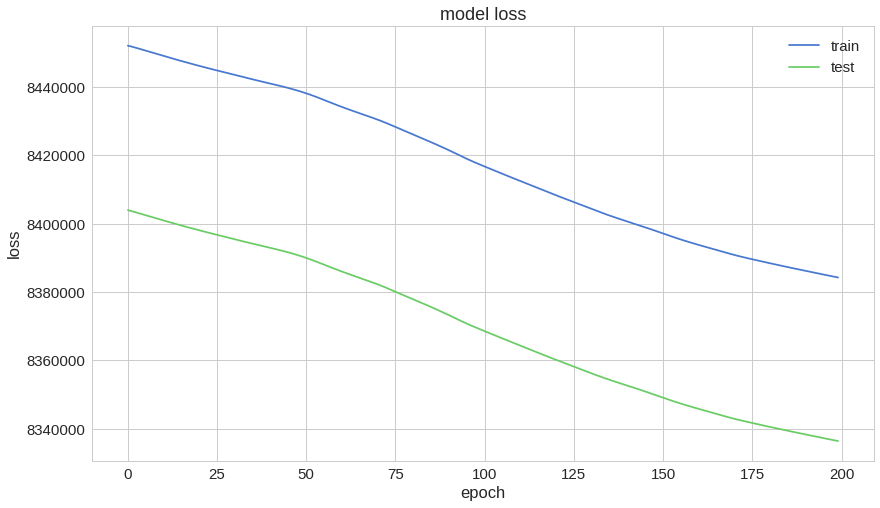

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [20]:
import numpy as np
x_train = np.random.randint(1,99,500000).reshape(5000,50,2)
y_train = np.cumsum(np.sum(x_train,axis=2),axis=1).reshape(5000,50)
x_test = np.random.randint(1,99,50000).reshape(500,50,2)
y_test = np.cumsum(np.sum(x_test,axis=2),axis=1).reshape(500,50)
x_train.shape, y_train.shape

((5000, 50, 2), (5000, 50))

In [22]:
model = Sequential()  
model.add(LSTM(32, input_shape=(50,2),return_sequences=False))  
# model.add(LSTM(1, return_sequences=True, activation='linear'))
model.add(Dense(50))
model.compile(loss='mse', optimizer='adam',metrics=['mse'])
history = model.fit(x_train, y_train, nb_epoch=200, batch_size=5000, verbose=2,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5000 samples, validate on 500 samples
Epoch 1/200
 - 1s - loss: 8455419.0000 - mean_squared_error: 8455419.0000 - val_loss: 8416800.0000 - val_mean_squared_error: 8416800.0000
Epoch 2/200
 - 0s - loss: 8455322.0000 - mean_squared_error: 8455322.0000 - val_loss: 8416683.0000 - val_mean_squared_error: 8416683.0000
Epoch 3/200
 - 0s - loss: 8455211.0000 - mean_squared_error: 8455211.0000 - val_loss: 8416563.0000 - val_mean_squared_error: 8416563.0000
Epoch 4/200
 - 0s - loss: 8455095.0000 - mean_squared_error: 8455095.0000 - val_loss: 8416445.0000 - val_mean_squared_error: 8416445.0000
Epoch 5/200
 - 0s - loss: 8454980.0000 - mean_squared_error: 8454980.0000 - val_loss: 8416332.0000 - val_mean_squared_error: 8416332.0000
Epoch 6/200
 - 0s - loss: 8454870.0000 - mean_squared_error: 8454870.0000 - val_loss: 8416226.0000 - val_mean_squared_error: 8416226.0000
Epoch 7/200
 - 0s - loss: 8454763.0000 - mean_squared_error: 8454763.0000 - val_loss: 8416128.0000 - val_mean_squared_error: 

Epoch 27/200
 - 0s - loss: 8452554.0000 - mean_squared_error: 8452554.0000 - val_loss: 8413904.0000 - val_mean_squared_error: 8413904.0000
Epoch 28/200
 - 0s - loss: 8452414.0000 - mean_squared_error: 8452414.0000 - val_loss: 8413764.0000 - val_mean_squared_error: 8413764.0000
Epoch 29/200
 - 0s - loss: 8452275.0000 - mean_squared_error: 8452275.0000 - val_loss: 8413621.0000 - val_mean_squared_error: 8413621.0000
Epoch 30/200
 - 0s - loss: 8452130.0000 - mean_squared_error: 8452130.0000 - val_loss: 8413475.0000 - val_mean_squared_error: 8413475.0000
Epoch 31/200
 - 0s - loss: 8451984.0000 - mean_squared_error: 8451984.0000 - val_loss: 8413329.0000 - val_mean_squared_error: 8413329.0000
Epoch 32/200
 - 0s - loss: 8451836.0000 - mean_squared_error: 8451836.0000 - val_loss: 8413179.0000 - val_mean_squared_error: 8413179.0000
Epoch 33/200
 - 0s - loss: 8451686.0000 - mean_squared_error: 8451686.0000 - val_loss: 8413028.0000 - val_mean_squared_error: 8413028.0000
Epoch 34/200
 - 0s - loss: 

 - 0s - loss: 8447959.0000 - mean_squared_error: 8447959.0000 - val_loss: 8409241.0000 - val_mean_squared_error: 8409241.0000
Epoch 54/200
 - 0s - loss: 8447730.0000 - mean_squared_error: 8447730.0000 - val_loss: 8409008.0000 - val_mean_squared_error: 8409008.0000
Epoch 55/200
 - 0s - loss: 8447499.0000 - mean_squared_error: 8447499.0000 - val_loss: 8408770.0000 - val_mean_squared_error: 8408770.0000
Epoch 56/200
 - 0s - loss: 8447262.0000 - mean_squared_error: 8447262.0000 - val_loss: 8408525.0000 - val_mean_squared_error: 8408525.0000
Epoch 57/200
 - 0s - loss: 8447018.0000 - mean_squared_error: 8447018.0000 - val_loss: 8408273.0000 - val_mean_squared_error: 8408273.0000
Epoch 58/200
 - 0s - loss: 8446767.0000 - mean_squared_error: 8446767.0000 - val_loss: 8408015.0000 - val_mean_squared_error: 8408015.0000
Epoch 59/200
 - 0s - loss: 8446507.0000 - mean_squared_error: 8446507.0000 - val_loss: 8407749.0000 - val_mean_squared_error: 8407749.0000
Epoch 60/200
 - 0s - loss: 8446242.0000 

 - 0s - loss: 8440874.0000 - mean_squared_error: 8440874.0000 - val_loss: 8402139.0000 - val_mean_squared_error: 8402139.0000
Epoch 80/200
 - 0s - loss: 8440615.0000 - mean_squared_error: 8440615.0000 - val_loss: 8401885.0000 - val_mean_squared_error: 8401885.0000
Epoch 81/200
 - 0s - loss: 8440359.0000 - mean_squared_error: 8440359.0000 - val_loss: 8401634.0000 - val_mean_squared_error: 8401634.0000
Epoch 82/200
 - 0s - loss: 8440106.0000 - mean_squared_error: 8440106.0000 - val_loss: 8401384.0000 - val_mean_squared_error: 8401384.0000
Epoch 83/200
 - 0s - loss: 8439854.0000 - mean_squared_error: 8439854.0000 - val_loss: 8401136.0000 - val_mean_squared_error: 8401136.0000
Epoch 84/200
 - 0s - loss: 8439605.0000 - mean_squared_error: 8439605.0000 - val_loss: 8400889.0000 - val_mean_squared_error: 8400889.0000
Epoch 85/200
 - 0s - loss: 8439358.0000 - mean_squared_error: 8439358.0000 - val_loss: 8400646.0000 - val_mean_squared_error: 8400646.0000
Epoch 86/200
 - 0s - loss: 8439115.0000 

 - 0s - loss: 8434713.0000 - mean_squared_error: 8434713.0000 - val_loss: 8395982.0000 - val_mean_squared_error: 8395982.0000
Epoch 106/200
 - 0s - loss: 8434482.0000 - mean_squared_error: 8434482.0000 - val_loss: 8395751.0000 - val_mean_squared_error: 8395751.0000
Epoch 107/200
 - 0s - loss: 8434251.0000 - mean_squared_error: 8434251.0000 - val_loss: 8395519.0000 - val_mean_squared_error: 8395519.0000
Epoch 108/200
 - 0s - loss: 8434020.0000 - mean_squared_error: 8434020.0000 - val_loss: 8395286.0000 - val_mean_squared_error: 8395286.0000
Epoch 109/200
 - 0s - loss: 8433784.0000 - mean_squared_error: 8433784.0000 - val_loss: 8395050.0000 - val_mean_squared_error: 8395050.0000
Epoch 110/200
 - 0s - loss: 8433548.0000 - mean_squared_error: 8433548.0000 - val_loss: 8394813.0000 - val_mean_squared_error: 8394813.0000
Epoch 111/200
 - 0s - loss: 8433309.0000 - mean_squared_error: 8433309.0000 - val_loss: 8394575.0000 - val_mean_squared_error: 8394575.0000
Epoch 112/200
 - 0s - loss: 843306

 - 0s - loss: 8428638.0000 - mean_squared_error: 8428638.0000 - val_loss: 8389951.0000 - val_mean_squared_error: 8389951.0000
Epoch 132/200
 - 0s - loss: 8428423.0000 - mean_squared_error: 8428423.0000 - val_loss: 8389738.0000 - val_mean_squared_error: 8389738.0000
Epoch 133/200
 - 0s - loss: 8428209.0000 - mean_squared_error: 8428209.0000 - val_loss: 8389526.0000 - val_mean_squared_error: 8389526.0000
Epoch 134/200
 - 0s - loss: 8427996.0000 - mean_squared_error: 8427996.0000 - val_loss: 8389315.0000 - val_mean_squared_error: 8389315.0000
Epoch 135/200
 - 0s - loss: 8427783.0000 - mean_squared_error: 8427783.0000 - val_loss: 8389104.0000 - val_mean_squared_error: 8389104.0000
Epoch 136/200
 - 0s - loss: 8427573.0000 - mean_squared_error: 8427573.0000 - val_loss: 8388894.0000 - val_mean_squared_error: 8388894.0000
Epoch 137/200
 - 0s - loss: 8427362.0000 - mean_squared_error: 8427362.0000 - val_loss: 8388684.0000 - val_mean_squared_error: 8388684.0000
Epoch 138/200
 - 0s - loss: 842715

 - 0s - loss: 8423322.0000 - mean_squared_error: 8423322.0000 - val_loss: 8384656.5000 - val_mean_squared_error: 8384656.5000
Epoch 158/200
 - 0s - loss: 8423126.0000 - mean_squared_error: 8423126.0000 - val_loss: 8384460.5000 - val_mean_squared_error: 8384460.5000
Epoch 159/200
 - 0s - loss: 8422929.0000 - mean_squared_error: 8422929.0000 - val_loss: 8384262.5000 - val_mean_squared_error: 8384262.5000
Epoch 160/200
 - 0s - loss: 8422733.0000 - mean_squared_error: 8422733.0000 - val_loss: 8384065.5000 - val_mean_squared_error: 8384065.5000
Epoch 161/200
 - 0s - loss: 8422535.0000 - mean_squared_error: 8422535.0000 - val_loss: 8383866.5000 - val_mean_squared_error: 8383866.5000
Epoch 162/200
 - 0s - loss: 8422335.0000 - mean_squared_error: 8422335.0000 - val_loss: 8383666.0000 - val_mean_squared_error: 8383666.0000
Epoch 163/200
 - 0s - loss: 8422134.0000 - mean_squared_error: 8422134.0000 - val_loss: 8383462.5000 - val_mean_squared_error: 8383462.5000
Epoch 164/200
 - 0s - loss: 842193

 - 0s - loss: 8417954.0000 - mean_squared_error: 8417954.0000 - val_loss: 8379290.5000 - val_mean_squared_error: 8379290.5000
Epoch 184/200
 - 0s - loss: 8417751.0000 - mean_squared_error: 8417751.0000 - val_loss: 8379088.5000 - val_mean_squared_error: 8379088.5000
Epoch 185/200
 - 0s - loss: 8417549.0000 - mean_squared_error: 8417549.0000 - val_loss: 8378886.0000 - val_mean_squared_error: 8378886.0000
Epoch 186/200
 - 0s - loss: 8417346.0000 - mean_squared_error: 8417346.0000 - val_loss: 8378685.0000 - val_mean_squared_error: 8378685.0000
Epoch 187/200
 - 0s - loss: 8417145.0000 - mean_squared_error: 8417145.0000 - val_loss: 8378483.5000 - val_mean_squared_error: 8378483.5000
Epoch 188/200
 - 0s - loss: 8416942.0000 - mean_squared_error: 8416942.0000 - val_loss: 8378283.5000 - val_mean_squared_error: 8378283.5000
Epoch 189/200
 - 0s - loss: 8416743.0000 - mean_squared_error: 8416743.0000 - val_loss: 8378083.5000 - val_mean_squared_error: 8378083.5000
Epoch 190/200
 - 0s - loss: 841654

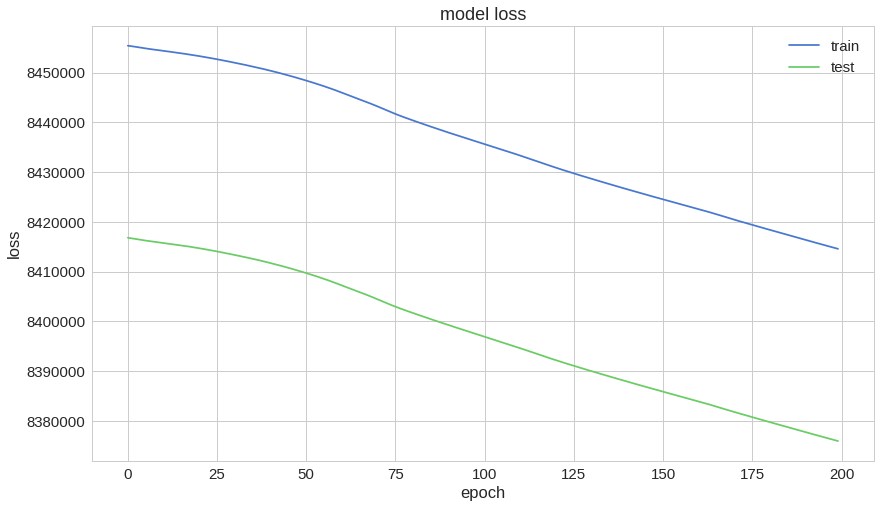

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [25]:
from keras.layers import Activation, Dense
model = Sequential()  
model.add(LSTM(32, input_shape=(50,2),return_sequences=False))  
# model.add(LSTM(1, return_sequences=True, activation='linear'))
model.add(Dense(50))
model.add(Activation('linear')) 
model.compile(loss='mse', optimizer='adam',metrics=['mse'])
history = model.fit(x_train, y_train, nb_epoch=200, batch_size=5000, verbose=2,validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5000 samples, validate on 500 samples
Epoch 1/200
 - 1s - loss: 8455977.0000 - mean_squared_error: 8455977.0000 - val_loss: 8417391.0000 - val_mean_squared_error: 8417391.0000
Epoch 2/200
 - 0s - loss: 8455926.0000 - mean_squared_error: 8455926.0000 - val_loss: 8417324.0000 - val_mean_squared_error: 8417324.0000
Epoch 3/200
 - 0s - loss: 8455861.0000 - mean_squared_error: 8455861.0000 - val_loss: 8417265.0000 - val_mean_squared_error: 8417265.0000
Epoch 4/200
 - 0s - loss: 8455801.0000 - mean_squared_error: 8455801.0000 - val_loss: 8417205.0000 - val_mean_squared_error: 8417205.0000
Epoch 5/200
 - 0s - loss: 8455742.0000 - mean_squared_error: 8455742.0000 - val_loss: 8417146.0000 - val_mean_squared_error: 8417146.0000
Epoch 6/200
 - 0s - loss: 8455682.0000 - mean_squared_error: 8455682.0000 - val_loss: 8417086.0000 - val_mean_squared_error: 8417086.0000
Epoch 7/200
 - 0s - loss: 8455622.0000 - mean_squared_error: 8455622.0000 - val_loss: 8417028.0000 - val_mean_squared_error: 

Epoch 27/200
 - 0s - loss: 8454341.0000 - mean_squared_error: 8454341.0000 - val_loss: 8415732.0000 - val_mean_squared_error: 8415732.0000
Epoch 28/200
 - 0s - loss: 8454260.0000 - mean_squared_error: 8454260.0000 - val_loss: 8415650.0000 - val_mean_squared_error: 8415650.0000
Epoch 29/200
 - 0s - loss: 8454179.0000 - mean_squared_error: 8454179.0000 - val_loss: 8415566.0000 - val_mean_squared_error: 8415566.0000
Epoch 30/200
 - 0s - loss: 8454093.0000 - mean_squared_error: 8454093.0000 - val_loss: 8415479.0000 - val_mean_squared_error: 8415479.0000
Epoch 31/200
 - 0s - loss: 8454006.0000 - mean_squared_error: 8454006.0000 - val_loss: 8415389.0000 - val_mean_squared_error: 8415389.0000
Epoch 32/200
 - 0s - loss: 8453915.0000 - mean_squared_error: 8453915.0000 - val_loss: 8415297.0000 - val_mean_squared_error: 8415297.0000
Epoch 33/200
 - 0s - loss: 8453823.0000 - mean_squared_error: 8453823.0000 - val_loss: 8415200.0000 - val_mean_squared_error: 8415200.0000
Epoch 34/200
 - 0s - loss: 

 - 0s - loss: 8451322.0000 - mean_squared_error: 8451322.0000 - val_loss: 8412672.0000 - val_mean_squared_error: 8412672.0000
Epoch 54/200
 - 0s - loss: 8451181.0000 - mean_squared_error: 8451181.0000 - val_loss: 8412532.0000 - val_mean_squared_error: 8412532.0000
Epoch 55/200
 - 0s - loss: 8451041.0000 - mean_squared_error: 8451041.0000 - val_loss: 8412393.0000 - val_mean_squared_error: 8412393.0000
Epoch 56/200
 - 0s - loss: 8450903.0000 - mean_squared_error: 8450903.0000 - val_loss: 8412254.0000 - val_mean_squared_error: 8412254.0000
Epoch 57/200
 - 0s - loss: 8450764.0000 - mean_squared_error: 8450764.0000 - val_loss: 8412113.0000 - val_mean_squared_error: 8412113.0000
Epoch 58/200
 - 0s - loss: 8450624.0000 - mean_squared_error: 8450624.0000 - val_loss: 8411970.0000 - val_mean_squared_error: 8411970.0000
Epoch 59/200
 - 0s - loss: 8450482.0000 - mean_squared_error: 8450482.0000 - val_loss: 8411822.0000 - val_mean_squared_error: 8411822.0000
Epoch 60/200
 - 0s - loss: 8450336.0000 

 - 0s - loss: 8446025.0000 - mean_squared_error: 8446025.0000 - val_loss: 8407209.0000 - val_mean_squared_error: 8407209.0000
Epoch 80/200
 - 0s - loss: 8445741.0000 - mean_squared_error: 8445741.0000 - val_loss: 8406910.0000 - val_mean_squared_error: 8406910.0000
Epoch 81/200
 - 0s - loss: 8445443.0000 - mean_squared_error: 8445443.0000 - val_loss: 8406601.0000 - val_mean_squared_error: 8406601.0000
Epoch 82/200
 - 0s - loss: 8445135.0000 - mean_squared_error: 8445135.0000 - val_loss: 8406279.0000 - val_mean_squared_error: 8406279.0000
Epoch 83/200
 - 0s - loss: 8444817.0000 - mean_squared_error: 8444817.0000 - val_loss: 8405951.0000 - val_mean_squared_error: 8405951.0000
Epoch 84/200
 - 0s - loss: 8444489.0000 - mean_squared_error: 8444489.0000 - val_loss: 8405622.0000 - val_mean_squared_error: 8405622.0000
Epoch 85/200
 - 0s - loss: 8444159.0000 - mean_squared_error: 8444159.0000 - val_loss: 8405294.0000 - val_mean_squared_error: 8405294.0000
Epoch 86/200
 - 0s - loss: 8443829.0000 

 - 0s - loss: 8436036.0000 - mean_squared_error: 8436036.0000 - val_loss: 8397114.0000 - val_mean_squared_error: 8397114.0000
Epoch 106/200
 - 0s - loss: 8435610.0000 - mean_squared_error: 8435610.0000 - val_loss: 8396729.0000 - val_mean_squared_error: 8396729.0000
Epoch 107/200
 - 0s - loss: 8435221.0000 - mean_squared_error: 8435221.0000 - val_loss: 8396378.0000 - val_mean_squared_error: 8396378.0000
Epoch 108/200
 - 0s - loss: 8434871.0000 - mean_squared_error: 8434871.0000 - val_loss: 8396052.0000 - val_mean_squared_error: 8396052.0000
Epoch 109/200
 - 0s - loss: 8434542.0000 - mean_squared_error: 8434542.0000 - val_loss: 8395742.0000 - val_mean_squared_error: 8395742.0000
Epoch 110/200
 - 0s - loss: 8434229.0000 - mean_squared_error: 8434229.0000 - val_loss: 8395443.0000 - val_mean_squared_error: 8395443.0000
Epoch 111/200
 - 0s - loss: 8433931.0000 - mean_squared_error: 8433931.0000 - val_loss: 8395157.0000 - val_mean_squared_error: 8395157.0000
Epoch 112/200
 - 0s - loss: 843364

 - 0s - loss: 8428712.0000 - mean_squared_error: 8428712.0000 - val_loss: 8389978.0000 - val_mean_squared_error: 8389978.0000
Epoch 132/200
 - 0s - loss: 8428462.0000 - mean_squared_error: 8428462.0000 - val_loss: 8389728.0000 - val_mean_squared_error: 8389728.0000
Epoch 133/200
 - 0s - loss: 8428212.0000 - mean_squared_error: 8428212.0000 - val_loss: 8389478.0000 - val_mean_squared_error: 8389478.0000
Epoch 134/200
 - 0s - loss: 8427964.0000 - mean_squared_error: 8427964.0000 - val_loss: 8389229.0000 - val_mean_squared_error: 8389229.0000
Epoch 135/200
 - 0s - loss: 8427716.0000 - mean_squared_error: 8427716.0000 - val_loss: 8388980.0000 - val_mean_squared_error: 8388980.0000
Epoch 136/200
 - 0s - loss: 8427468.0000 - mean_squared_error: 8427468.0000 - val_loss: 8388730.0000 - val_mean_squared_error: 8388730.0000
Epoch 137/200
 - 0s - loss: 8427220.0000 - mean_squared_error: 8427220.0000 - val_loss: 8388481.0000 - val_mean_squared_error: 8388481.0000
Epoch 138/200
 - 0s - loss: 842697

 - 0s - loss: 8422175.0000 - mean_squared_error: 8422175.0000 - val_loss: 8383443.5000 - val_mean_squared_error: 8383443.5000
Epoch 158/200
 - 0s - loss: 8421913.0000 - mean_squared_error: 8421913.0000 - val_loss: 8383185.0000 - val_mean_squared_error: 8383185.0000
Epoch 159/200
 - 0s - loss: 8421654.0000 - mean_squared_error: 8421654.0000 - val_loss: 8382930.0000 - val_mean_squared_error: 8382930.0000
Epoch 160/200
 - 0s - loss: 8421396.0000 - mean_squared_error: 8421396.0000 - val_loss: 8382677.0000 - val_mean_squared_error: 8382677.0000
Epoch 161/200
 - 0s - loss: 8421141.0000 - mean_squared_error: 8421141.0000 - val_loss: 8382428.5000 - val_mean_squared_error: 8382428.5000
Epoch 162/200
 - 0s - loss: 8420891.0000 - mean_squared_error: 8420891.0000 - val_loss: 8382181.0000 - val_mean_squared_error: 8382181.0000
Epoch 163/200
 - 0s - loss: 8420642.0000 - mean_squared_error: 8420642.0000 - val_loss: 8381934.5000 - val_mean_squared_error: 8381934.5000
Epoch 164/200
 - 0s - loss: 842039

 - 0s - loss: 8416120.0000 - mean_squared_error: 8416120.0000 - val_loss: 8377450.0000 - val_mean_squared_error: 8377450.0000
Epoch 184/200
 - 0s - loss: 8415905.0000 - mean_squared_error: 8415905.0000 - val_loss: 8377237.0000 - val_mean_squared_error: 8377237.0000
Epoch 185/200
 - 0s - loss: 8415691.0000 - mean_squared_error: 8415691.0000 - val_loss: 8377023.5000 - val_mean_squared_error: 8377023.5000
Epoch 186/200
 - 0s - loss: 8415478.0000 - mean_squared_error: 8415478.0000 - val_loss: 8376810.5000 - val_mean_squared_error: 8376810.5000
Epoch 187/200
 - 0s - loss: 8415265.0000 - mean_squared_error: 8415265.0000 - val_loss: 8376598.5000 - val_mean_squared_error: 8376598.5000
Epoch 188/200
 - 0s - loss: 8415051.0000 - mean_squared_error: 8415051.0000 - val_loss: 8376386.5000 - val_mean_squared_error: 8376386.5000
Epoch 189/200
 - 0s - loss: 8414840.0000 - mean_squared_error: 8414840.0000 - val_loss: 8376175.0000 - val_mean_squared_error: 8376175.0000
Epoch 190/200
 - 0s - loss: 841462

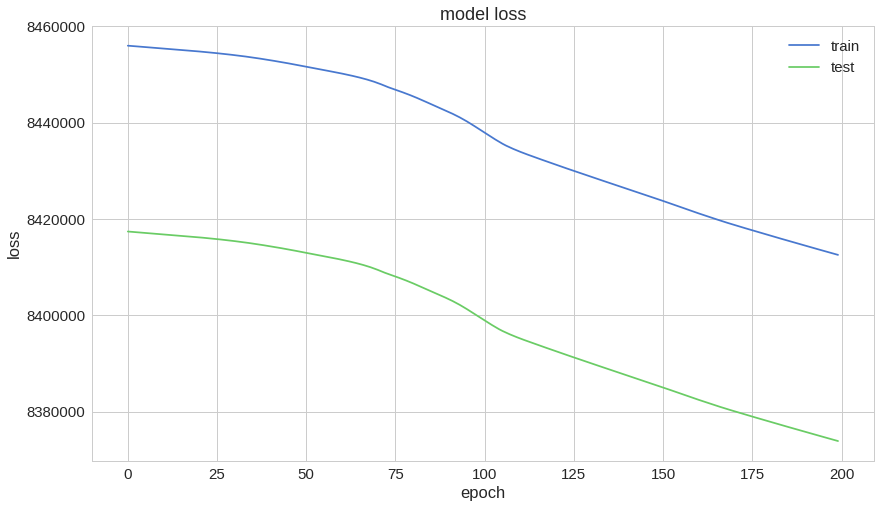

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [15]:
# https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
from numpy import array
length = 5
seq = array([i/float(length) for i in range(length)])
print(seq)

[0.  0.2 0.4 0.6 0.8]


In [16]:
X = seq.reshape(5, 1, 1)
y = seq.reshape(5, 1)
X,y

(array([[[0. ]],
 
        [[0.2]],
 
        [[0.4]],
 
        [[0.6]],
 
        [[0.8]]]), array([[0. ],
        [0.2],
        [0.4],
        [0.6],
        [0.8]]))

In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(len(seq), 1, 1)
y = seq.reshape(len(seq), 1)
# define LSTM configuration
n_neurons = length
n_batch = length
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
	print('%.1f' % value)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
 - 1s - loss: 0.2510
Epoch 2/1000
 - 0s - loss: 0.2497
Epoch 3/1000
 - 0s - loss: 0.2480
Epoch 4/1000
 - 0s - loss: 0.2465
Epoch 5/1000
 - 0s - loss: 0.2448
Epoch 6/1000
 - 0s - loss: 0.2432
Epoch 7/1000
 - 0s - loss: 0.2416
Epoch 8/1000
 - 0s - loss: 0.2399
Epoch 9/1000
 - 0s - loss: 0.2383
Epoch 10/1000
 - 0s - loss: 0.2367
Epoch 11/1000
 - 0s - loss: 0.2351
Epoch 12/1000
 - 0s - loss: 0.2335
Epoch 13/1000
 - 0s - loss: 0.2319
Epoch 14/1000
 - 0s - loss: 0.2303
Epoch 15/1000
 - 0s - loss: 0.2287
Epoch 16/1000
 - 0s

Epoch 45/1000
 - 0s - loss: 0.1856
Epoch 46/1000
 - 0s - loss: 0.1843
Epoch 47/1000
 - 0s - loss: 0.1830
Epoch 48/1000
 - 0s - loss: 0.1817
Epoch 49/1000
 - 0s - loss: 0.1804
Epoch 50/1000
 - 0s - loss: 0.1792
Epoch 51/1000
 - 0s - loss: 0.1779
Epoch 52/1000
 - 0s - loss: 0.1767
Epoch 53/1000
 - 0s - loss: 0.1754
Epoch 54/1000
 - 0s - loss: 0.1742
Epoch 55/1000
 - 0s - loss: 0.1730
Epoch 56/1000
 - 0s - loss: 0.1718
Epoch 57/1000
 - 0s - loss: 0.1706
Epoch 58/1000
 - 0s - loss: 0.1694
Epoch 59/1000
 - 0s - loss: 0.1682
Epoch 60/1000
 - 0s - loss: 0.1670
Epoch 61/1000
 - 0s - loss: 0.1658
Epoch 62/1000
 - 0s - loss: 0.1646
Epoch 63/1000
 - 0s - loss: 0.1635
Epoch 64/1000
 - 0s - loss: 0.1623
Epoch 65/1000
 - 0s - loss: 0.1612
Epoch 66/1000
 - 0s - loss: 0.1600
Epoch 67/1000
 - 0s - loss: 0.1589
Epoch 68/1000
 - 0s - loss: 0.1577
Epoch 69/1000
 - 0s - loss: 0.1566
Epoch 70/1000
 - 0s - loss: 0.1555
Epoch 71/1000
 - 0s - loss: 0.1544
Epoch 72/1000
 - 0s - loss: 0.1533
Epoch 73/1000
 - 0s 

Epoch 100/1000
 - 0s - loss: 0.1242
Epoch 101/1000
 - 0s - loss: 0.1233
Epoch 102/1000
 - 0s - loss: 0.1223
Epoch 103/1000
 - 0s - loss: 0.1214
Epoch 104/1000
 - 0s - loss: 0.1204
Epoch 105/1000
 - 0s - loss: 0.1195
Epoch 106/1000
 - 0s - loss: 0.1185
Epoch 107/1000
 - 0s - loss: 0.1176
Epoch 108/1000
 - 0s - loss: 0.1167
Epoch 109/1000
 - 0s - loss: 0.1157
Epoch 110/1000
 - 0s - loss: 0.1148
Epoch 111/1000
 - 0s - loss: 0.1139
Epoch 112/1000
 - 0s - loss: 0.1130
Epoch 113/1000
 - 0s - loss: 0.1121
Epoch 114/1000
 - 0s - loss: 0.1112
Epoch 115/1000
 - 0s - loss: 0.1103
Epoch 116/1000
 - 0s - loss: 0.1094
Epoch 117/1000
 - 0s - loss: 0.1085
Epoch 118/1000
 - 0s - loss: 0.1076
Epoch 119/1000
 - 0s - loss: 0.1067
Epoch 120/1000
 - 0s - loss: 0.1059
Epoch 121/1000
 - 0s - loss: 0.1050
Epoch 122/1000
 - 0s - loss: 0.1042
Epoch 123/1000
 - 0s - loss: 0.1033
Epoch 124/1000
 - 0s - loss: 0.1025
Epoch 125/1000
 - 0s - loss: 0.1016
Epoch 126/1000
 - 0s - loss: 0.1008
Epoch 127/1000
 - 0s - loss:

 - 0s - loss: 0.0819
Epoch 152/1000
 - 0s - loss: 0.0812
Epoch 153/1000
 - 0s - loss: 0.0805
Epoch 154/1000
 - 0s - loss: 0.0799
Epoch 155/1000
 - 0s - loss: 0.0792
Epoch 156/1000
 - 0s - loss: 0.0786
Epoch 157/1000
 - 0s - loss: 0.0780
Epoch 158/1000
 - 0s - loss: 0.0773
Epoch 159/1000
 - 0s - loss: 0.0767
Epoch 160/1000
 - 0s - loss: 0.0761
Epoch 161/1000
 - 0s - loss: 0.0755
Epoch 162/1000
 - 0s - loss: 0.0749
Epoch 163/1000
 - 0s - loss: 0.0743
Epoch 164/1000
 - 0s - loss: 0.0737
Epoch 165/1000
 - 0s - loss: 0.0731
Epoch 166/1000
 - 0s - loss: 0.0725
Epoch 167/1000
 - 0s - loss: 0.0720
Epoch 168/1000
 - 0s - loss: 0.0714
Epoch 169/1000
 - 0s - loss: 0.0709
Epoch 170/1000
 - 0s - loss: 0.0703
Epoch 171/1000
 - 0s - loss: 0.0698
Epoch 172/1000
 - 0s - loss: 0.0692
Epoch 173/1000
 - 0s - loss: 0.0687
Epoch 174/1000
 - 0s - loss: 0.0682
Epoch 175/1000
 - 0s - loss: 0.0677
Epoch 176/1000
 - 0s - loss: 0.0672
Epoch 177/1000
 - 0s - loss: 0.0667
Epoch 178/1000
 - 0s - loss: 0.0662
Epoch 1

 - 0s - loss: 0.0557
Epoch 205/1000
 - 0s - loss: 0.0554
Epoch 206/1000
 - 0s - loss: 0.0551
Epoch 207/1000
 - 0s - loss: 0.0548
Epoch 208/1000
 - 0s - loss: 0.0545
Epoch 209/1000
 - 0s - loss: 0.0542
Epoch 210/1000
 - 0s - loss: 0.0539
Epoch 211/1000
 - 0s - loss: 0.0536
Epoch 212/1000
 - 0s - loss: 0.0533
Epoch 213/1000
 - 0s - loss: 0.0530
Epoch 214/1000
 - 0s - loss: 0.0528
Epoch 215/1000
 - 0s - loss: 0.0525
Epoch 216/1000
 - 0s - loss: 0.0522
Epoch 217/1000
 - 0s - loss: 0.0520
Epoch 218/1000
 - 0s - loss: 0.0517
Epoch 219/1000
 - 0s - loss: 0.0515
Epoch 220/1000
 - 0s - loss: 0.0512
Epoch 221/1000
 - 0s - loss: 0.0510
Epoch 222/1000
 - 0s - loss: 0.0508
Epoch 223/1000
 - 0s - loss: 0.0505
Epoch 224/1000
 - 0s - loss: 0.0503
Epoch 225/1000
 - 0s - loss: 0.0501
Epoch 226/1000
 - 0s - loss: 0.0499
Epoch 227/1000
 - 0s - loss: 0.0496
Epoch 228/1000
 - 0s - loss: 0.0494
Epoch 229/1000
 - 0s - loss: 0.0492
Epoch 230/1000
 - 0s - loss: 0.0490
Epoch 231/1000
 - 0s - loss: 0.0488
Epoch 2

Epoch 257/1000
 - 0s - loss: 0.0445
Epoch 258/1000
 - 0s - loss: 0.0444
Epoch 259/1000
 - 0s - loss: 0.0443
Epoch 260/1000
 - 0s - loss: 0.0441
Epoch 261/1000
 - 0s - loss: 0.0440
Epoch 262/1000
 - 0s - loss: 0.0439
Epoch 263/1000
 - 0s - loss: 0.0437
Epoch 264/1000
 - 0s - loss: 0.0436
Epoch 265/1000
 - 0s - loss: 0.0435
Epoch 266/1000
 - 0s - loss: 0.0433
Epoch 267/1000
 - 0s - loss: 0.0432
Epoch 268/1000
 - 0s - loss: 0.0431
Epoch 269/1000
 - 0s - loss: 0.0430
Epoch 270/1000
 - 0s - loss: 0.0428
Epoch 271/1000
 - 0s - loss: 0.0427
Epoch 272/1000
 - 0s - loss: 0.0426
Epoch 273/1000
 - 0s - loss: 0.0425
Epoch 274/1000
 - 0s - loss: 0.0424
Epoch 275/1000
 - 0s - loss: 0.0422
Epoch 276/1000
 - 0s - loss: 0.0421
Epoch 277/1000
 - 0s - loss: 0.0420
Epoch 278/1000
 - 0s - loss: 0.0419
Epoch 279/1000
 - 0s - loss: 0.0418
Epoch 280/1000
 - 0s - loss: 0.0417
Epoch 281/1000
 - 0s - loss: 0.0415
Epoch 282/1000
 - 0s - loss: 0.0414
Epoch 283/1000
 - 0s - loss: 0.0413
Epoch 284/1000
 - 0s - loss:

 - 0s - loss: 0.0384
Epoch 310/1000
 - 0s - loss: 0.0383
Epoch 311/1000
 - 0s - loss: 0.0382
Epoch 312/1000
 - 0s - loss: 0.0381
Epoch 313/1000
 - 0s - loss: 0.0380
Epoch 314/1000
 - 0s - loss: 0.0379
Epoch 315/1000
 - 0s - loss: 0.0378
Epoch 316/1000
 - 0s - loss: 0.0377
Epoch 317/1000
 - 0s - loss: 0.0376
Epoch 318/1000
 - 0s - loss: 0.0374
Epoch 319/1000
 - 0s - loss: 0.0373
Epoch 320/1000
 - 0s - loss: 0.0372
Epoch 321/1000
 - 0s - loss: 0.0371
Epoch 322/1000
 - 0s - loss: 0.0370
Epoch 323/1000
 - 0s - loss: 0.0369
Epoch 324/1000
 - 0s - loss: 0.0368
Epoch 325/1000
 - 0s - loss: 0.0367
Epoch 326/1000
 - 0s - loss: 0.0366
Epoch 327/1000
 - 0s - loss: 0.0365
Epoch 328/1000
 - 0s - loss: 0.0364
Epoch 329/1000
 - 0s - loss: 0.0362
Epoch 330/1000
 - 0s - loss: 0.0361
Epoch 331/1000
 - 0s - loss: 0.0360
Epoch 332/1000
 - 0s - loss: 0.0359
Epoch 333/1000
 - 0s - loss: 0.0358
Epoch 334/1000
 - 0s - loss: 0.0357
Epoch 335/1000
 - 0s - loss: 0.0356
Epoch 336/1000
 - 0s - loss: 0.0355
Epoch 3

Epoch 362/1000
 - 0s - loss: 0.0326
Epoch 363/1000
 - 0s - loss: 0.0325
Epoch 364/1000
 - 0s - loss: 0.0323
Epoch 365/1000
 - 0s - loss: 0.0322
Epoch 366/1000
 - 0s - loss: 0.0321
Epoch 367/1000
 - 0s - loss: 0.0320
Epoch 368/1000
 - 0s - loss: 0.0319
Epoch 369/1000
 - 0s - loss: 0.0318
Epoch 370/1000
 - 0s - loss: 0.0317
Epoch 371/1000
 - 0s - loss: 0.0316
Epoch 372/1000
 - 0s - loss: 0.0314
Epoch 373/1000
 - 0s - loss: 0.0313
Epoch 374/1000
 - 0s - loss: 0.0312
Epoch 375/1000
 - 0s - loss: 0.0311
Epoch 376/1000
 - 0s - loss: 0.0310
Epoch 377/1000
 - 0s - loss: 0.0309
Epoch 378/1000
 - 0s - loss: 0.0308
Epoch 379/1000
 - 0s - loss: 0.0306
Epoch 380/1000
 - 0s - loss: 0.0305
Epoch 381/1000
 - 0s - loss: 0.0304
Epoch 382/1000
 - 0s - loss: 0.0303
Epoch 383/1000
 - 0s - loss: 0.0302
Epoch 384/1000
 - 0s - loss: 0.0301
Epoch 385/1000
 - 0s - loss: 0.0300
Epoch 386/1000
 - 0s - loss: 0.0299
Epoch 387/1000
 - 0s - loss: 0.0297
Epoch 388/1000
 - 0s - loss: 0.0296
Epoch 389/1000
 - 0s - loss:

 - 0s - loss: 0.0266
Epoch 415/1000
 - 0s - loss: 0.0265
Epoch 416/1000
 - 0s - loss: 0.0264
Epoch 417/1000
 - 0s - loss: 0.0263
Epoch 418/1000
 - 0s - loss: 0.0262
Epoch 419/1000
 - 0s - loss: 0.0261
Epoch 420/1000
 - 0s - loss: 0.0260
Epoch 421/1000
 - 0s - loss: 0.0258
Epoch 422/1000
 - 0s - loss: 0.0257
Epoch 423/1000
 - 0s - loss: 0.0256
Epoch 424/1000
 - 0s - loss: 0.0255
Epoch 425/1000
 - 0s - loss: 0.0254
Epoch 426/1000
 - 0s - loss: 0.0253
Epoch 427/1000
 - 0s - loss: 0.0251
Epoch 428/1000
 - 0s - loss: 0.0250
Epoch 429/1000
 - 0s - loss: 0.0249
Epoch 430/1000
 - 0s - loss: 0.0248
Epoch 431/1000
 - 0s - loss: 0.0247
Epoch 432/1000
 - 0s - loss: 0.0246
Epoch 433/1000
 - 0s - loss: 0.0245
Epoch 434/1000
 - 0s - loss: 0.0243
Epoch 435/1000
 - 0s - loss: 0.0242
Epoch 436/1000
 - 0s - loss: 0.0241
Epoch 437/1000
 - 0s - loss: 0.0240
Epoch 438/1000
 - 0s - loss: 0.0239
Epoch 439/1000
 - 0s - loss: 0.0238
Epoch 440/1000
 - 0s - loss: 0.0237
Epoch 441/1000
 - 0s - loss: 0.0235
Epoch 4

 - 0s - loss: 0.0206
Epoch 468/1000
 - 0s - loss: 0.0205
Epoch 469/1000
 - 0s - loss: 0.0204
Epoch 470/1000
 - 0s - loss: 0.0203
Epoch 471/1000
 - 0s - loss: 0.0201
Epoch 472/1000
 - 0s - loss: 0.0200
Epoch 473/1000
 - 0s - loss: 0.0199
Epoch 474/1000
 - 0s - loss: 0.0198
Epoch 475/1000
 - 0s - loss: 0.0197
Epoch 476/1000
 - 0s - loss: 0.0196
Epoch 477/1000
 - 0s - loss: 0.0195
Epoch 478/1000
 - 0s - loss: 0.0194
Epoch 479/1000
 - 0s - loss: 0.0193
Epoch 480/1000
 - 0s - loss: 0.0191
Epoch 481/1000
 - 0s - loss: 0.0190
Epoch 482/1000
 - 0s - loss: 0.0189
Epoch 483/1000
 - 0s - loss: 0.0188
Epoch 484/1000
 - 0s - loss: 0.0187
Epoch 485/1000
 - 0s - loss: 0.0186
Epoch 486/1000
 - 0s - loss: 0.0185
Epoch 487/1000
 - 0s - loss: 0.0184
Epoch 488/1000
 - 0s - loss: 0.0183
Epoch 489/1000
 - 0s - loss: 0.0182
Epoch 490/1000
 - 0s - loss: 0.0180
Epoch 491/1000
 - 0s - loss: 0.0179
Epoch 492/1000
 - 0s - loss: 0.0178
Epoch 493/1000
 - 0s - loss: 0.0177
Epoch 494/1000
 - 0s - loss: 0.0176
Epoch 4

Epoch 521/1000
 - 0s - loss: 0.0147
Epoch 522/1000
 - 0s - loss: 0.0146
Epoch 523/1000
 - 0s - loss: 0.0145
Epoch 524/1000
 - 0s - loss: 0.0144
Epoch 525/1000
 - 0s - loss: 0.0143
Epoch 526/1000
 - 0s - loss: 0.0142
Epoch 527/1000
 - 0s - loss: 0.0141
Epoch 528/1000
 - 0s - loss: 0.0140
Epoch 529/1000
 - 0s - loss: 0.0139
Epoch 530/1000
 - 0s - loss: 0.0138
Epoch 531/1000
 - 0s - loss: 0.0137
Epoch 532/1000
 - 0s - loss: 0.0136
Epoch 533/1000
 - 0s - loss: 0.0135
Epoch 534/1000
 - 0s - loss: 0.0134
Epoch 535/1000
 - 0s - loss: 0.0133
Epoch 536/1000
 - 0s - loss: 0.0132
Epoch 537/1000
 - 0s - loss: 0.0131
Epoch 538/1000
 - 0s - loss: 0.0130
Epoch 539/1000
 - 0s - loss: 0.0129
Epoch 540/1000
 - 0s - loss: 0.0128
Epoch 541/1000
 - 0s - loss: 0.0127
Epoch 542/1000
 - 0s - loss: 0.0127
Epoch 543/1000
 - 0s - loss: 0.0126
Epoch 544/1000
 - 0s - loss: 0.0125
Epoch 545/1000
 - 0s - loss: 0.0124
Epoch 546/1000
 - 0s - loss: 0.0123
Epoch 547/1000
 - 0s - loss: 0.0122
Epoch 548/1000
 - 0s - loss:

 - 0s - loss: 0.0098
Epoch 574/1000
 - 0s - loss: 0.0097
Epoch 575/1000
 - 0s - loss: 0.0096
Epoch 576/1000
 - 0s - loss: 0.0096
Epoch 577/1000
 - 0s - loss: 0.0095
Epoch 578/1000
 - 0s - loss: 0.0094
Epoch 579/1000
 - 0s - loss: 0.0093
Epoch 580/1000
 - 0s - loss: 0.0092
Epoch 581/1000
 - 0s - loss: 0.0091
Epoch 582/1000
 - 0s - loss: 0.0091
Epoch 583/1000
 - 0s - loss: 0.0090
Epoch 584/1000
 - 0s - loss: 0.0089
Epoch 585/1000
 - 0s - loss: 0.0088
Epoch 586/1000
 - 0s - loss: 0.0087
Epoch 587/1000
 - 0s - loss: 0.0086
Epoch 588/1000
 - 0s - loss: 0.0086
Epoch 589/1000
 - 0s - loss: 0.0085
Epoch 590/1000
 - 0s - loss: 0.0084
Epoch 591/1000
 - 0s - loss: 0.0083
Epoch 592/1000
 - 0s - loss: 0.0082
Epoch 593/1000
 - 0s - loss: 0.0082
Epoch 594/1000
 - 0s - loss: 0.0081
Epoch 595/1000
 - 0s - loss: 0.0080
Epoch 596/1000
 - 0s - loss: 0.0079
Epoch 597/1000
 - 0s - loss: 0.0079
Epoch 598/1000
 - 0s - loss: 0.0078
Epoch 599/1000
 - 0s - loss: 0.0077
Epoch 600/1000
 - 0s - loss: 0.0076
Epoch 6

Epoch 626/1000
 - 0s - loss: 0.0058
Epoch 627/1000
 - 0s - loss: 0.0058
Epoch 628/1000
 - 0s - loss: 0.0057
Epoch 629/1000
 - 0s - loss: 0.0056
Epoch 630/1000
 - 0s - loss: 0.0056
Epoch 631/1000
 - 0s - loss: 0.0055
Epoch 632/1000
 - 0s - loss: 0.0055
Epoch 633/1000
 - 0s - loss: 0.0054
Epoch 634/1000
 - 0s - loss: 0.0053
Epoch 635/1000
 - 0s - loss: 0.0053
Epoch 636/1000
 - 0s - loss: 0.0052
Epoch 637/1000
 - 0s - loss: 0.0052
Epoch 638/1000
 - 0s - loss: 0.0051
Epoch 639/1000
 - 0s - loss: 0.0050
Epoch 640/1000
 - 0s - loss: 0.0050
Epoch 641/1000
 - 0s - loss: 0.0049
Epoch 642/1000
 - 0s - loss: 0.0049
Epoch 643/1000
 - 0s - loss: 0.0048
Epoch 644/1000
 - 0s - loss: 0.0048
Epoch 645/1000
 - 0s - loss: 0.0047
Epoch 646/1000
 - 0s - loss: 0.0047
Epoch 647/1000
 - 0s - loss: 0.0046
Epoch 648/1000
 - 0s - loss: 0.0045
Epoch 649/1000
 - 0s - loss: 0.0045
Epoch 650/1000
 - 0s - loss: 0.0044
Epoch 651/1000
 - 0s - loss: 0.0044
Epoch 652/1000
 - 0s - loss: 0.0043
Epoch 653/1000
 - 0s - loss:

Epoch 680/1000
 - 0s - loss: 0.0031
Epoch 681/1000
 - 0s - loss: 0.0030
Epoch 682/1000
 - 0s - loss: 0.0030
Epoch 683/1000
 - 0s - loss: 0.0029
Epoch 684/1000
 - 0s - loss: 0.0029
Epoch 685/1000
 - 0s - loss: 0.0029
Epoch 686/1000
 - 0s - loss: 0.0028
Epoch 687/1000
 - 0s - loss: 0.0028
Epoch 688/1000
 - 0s - loss: 0.0027
Epoch 689/1000
 - 0s - loss: 0.0027
Epoch 690/1000
 - 0s - loss: 0.0027
Epoch 691/1000
 - 0s - loss: 0.0026
Epoch 692/1000
 - 0s - loss: 0.0026
Epoch 693/1000
 - 0s - loss: 0.0026
Epoch 694/1000
 - 0s - loss: 0.0025
Epoch 695/1000
 - 0s - loss: 0.0025
Epoch 696/1000
 - 0s - loss: 0.0025
Epoch 697/1000
 - 0s - loss: 0.0024
Epoch 698/1000
 - 0s - loss: 0.0024
Epoch 699/1000
 - 0s - loss: 0.0024
Epoch 700/1000
 - 0s - loss: 0.0023
Epoch 701/1000
 - 0s - loss: 0.0023
Epoch 702/1000
 - 0s - loss: 0.0023
Epoch 703/1000
 - 0s - loss: 0.0022
Epoch 704/1000
 - 0s - loss: 0.0022
Epoch 705/1000
 - 0s - loss: 0.0022
Epoch 706/1000
 - 0s - loss: 0.0022
Epoch 707/1000
 - 0s - loss:

 - 0s - loss: 0.0014
Epoch 735/1000
 - 0s - loss: 0.0014
Epoch 736/1000
 - 0s - loss: 0.0014
Epoch 737/1000
 - 0s - loss: 0.0014
Epoch 738/1000
 - 0s - loss: 0.0014
Epoch 739/1000
 - 0s - loss: 0.0013
Epoch 740/1000
 - 0s - loss: 0.0013
Epoch 741/1000
 - 0s - loss: 0.0013
Epoch 742/1000
 - 0s - loss: 0.0013
Epoch 743/1000
 - 0s - loss: 0.0013
Epoch 744/1000
 - 0s - loss: 0.0013
Epoch 745/1000
 - 0s - loss: 0.0012
Epoch 746/1000
 - 0s - loss: 0.0012
Epoch 747/1000
 - 0s - loss: 0.0012
Epoch 748/1000
 - 0s - loss: 0.0012
Epoch 749/1000
 - 0s - loss: 0.0012
Epoch 750/1000
 - 0s - loss: 0.0011
Epoch 751/1000
 - 0s - loss: 0.0011
Epoch 752/1000
 - 0s - loss: 0.0011
Epoch 753/1000
 - 0s - loss: 0.0011
Epoch 754/1000
 - 0s - loss: 0.0011
Epoch 755/1000
 - 0s - loss: 0.0011
Epoch 756/1000
 - 0s - loss: 0.0011
Epoch 757/1000
 - 0s - loss: 0.0010
Epoch 758/1000
 - 0s - loss: 0.0010
Epoch 759/1000
 - 0s - loss: 0.0010
Epoch 760/1000
 - 0s - loss: 9.9261e-04
Epoch 761/1000
 - 0s - loss: 9.7842e-04

 - 0s - loss: 6.9738e-04
Epoch 786/1000
 - 0s - loss: 6.8789e-04
Epoch 787/1000
 - 0s - loss: 6.7856e-04
Epoch 788/1000
 - 0s - loss: 6.6939e-04
Epoch 789/1000
 - 0s - loss: 6.6038e-04
Epoch 790/1000
 - 0s - loss: 6.5152e-04
Epoch 791/1000
 - 0s - loss: 6.4280e-04
Epoch 792/1000
 - 0s - loss: 6.3424e-04
Epoch 793/1000
 - 0s - loss: 6.2582e-04
Epoch 794/1000
 - 0s - loss: 6.1755e-04
Epoch 795/1000
 - 0s - loss: 6.0941e-04
Epoch 796/1000
 - 0s - loss: 6.0142e-04
Epoch 797/1000
 - 0s - loss: 5.9357e-04
Epoch 798/1000
 - 0s - loss: 5.8585e-04
Epoch 799/1000
 - 0s - loss: 5.7827e-04
Epoch 800/1000
 - 0s - loss: 5.7082e-04
Epoch 801/1000
 - 0s - loss: 5.6350e-04
Epoch 802/1000
 - 0s - loss: 5.5631e-04
Epoch 803/1000
 - 0s - loss: 5.4924e-04
Epoch 804/1000
 - 0s - loss: 5.4230e-04
Epoch 805/1000
 - 0s - loss: 5.3549e-04
Epoch 806/1000
 - 0s - loss: 5.2879e-04
Epoch 807/1000
 - 0s - loss: 5.2221e-04
Epoch 808/1000
 - 0s - loss: 5.1576e-04
Epoch 809/1000
 - 0s - loss: 5.0942e-04
Epoch 810/1000


Epoch 836/1000
 - 0s - loss: 3.7596e-04
Epoch 837/1000
 - 0s - loss: 3.7222e-04
Epoch 838/1000
 - 0s - loss: 3.6854e-04
Epoch 839/1000
 - 0s - loss: 3.6494e-04
Epoch 840/1000
 - 0s - loss: 3.6141e-04
Epoch 841/1000
 - 0s - loss: 3.5794e-04
Epoch 842/1000
 - 0s - loss: 3.5455e-04
Epoch 843/1000
 - 0s - loss: 3.5122e-04
Epoch 844/1000
 - 0s - loss: 3.4795e-04
Epoch 845/1000
 - 0s - loss: 3.4475e-04
Epoch 846/1000
 - 0s - loss: 3.4161e-04
Epoch 847/1000
 - 0s - loss: 3.3853e-04
Epoch 848/1000
 - 0s - loss: 3.3552e-04
Epoch 849/1000
 - 0s - loss: 3.3256e-04
Epoch 850/1000
 - 0s - loss: 3.2966e-04
Epoch 851/1000
 - 0s - loss: 3.2682e-04
Epoch 852/1000
 - 0s - loss: 3.2404e-04
Epoch 853/1000
 - 0s - loss: 3.2131e-04
Epoch 854/1000
 - 0s - loss: 3.1863e-04
Epoch 855/1000
 - 0s - loss: 3.1601e-04
Epoch 856/1000
 - 0s - loss: 3.1344e-04
Epoch 857/1000
 - 0s - loss: 3.1092e-04
Epoch 858/1000
 - 0s - loss: 3.0845e-04
Epoch 859/1000
 - 0s - loss: 3.0604e-04
Epoch 860/1000
 - 0s - loss: 3.0367e-04


 - 0s - loss: 2.5643e-04
Epoch 887/1000
 - 0s - loss: 2.5507e-04
Epoch 888/1000
 - 0s - loss: 2.5374e-04
Epoch 889/1000
 - 0s - loss: 2.5244e-04
Epoch 890/1000
 - 0s - loss: 2.5117e-04
Epoch 891/1000
 - 0s - loss: 2.4992e-04
Epoch 892/1000
 - 0s - loss: 2.4870e-04
Epoch 893/1000
 - 0s - loss: 2.4750e-04
Epoch 894/1000
 - 0s - loss: 2.4633e-04
Epoch 895/1000
 - 0s - loss: 2.4518e-04
Epoch 896/1000
 - 0s - loss: 2.4406e-04
Epoch 897/1000
 - 0s - loss: 2.4296e-04
Epoch 898/1000
 - 0s - loss: 2.4188e-04
Epoch 899/1000
 - 0s - loss: 2.4083e-04
Epoch 900/1000
 - 0s - loss: 2.3979e-04
Epoch 901/1000
 - 0s - loss: 2.3878e-04
Epoch 902/1000
 - 0s - loss: 2.3779e-04
Epoch 903/1000
 - 0s - loss: 2.3682e-04
Epoch 904/1000
 - 0s - loss: 2.3587e-04
Epoch 905/1000
 - 0s - loss: 2.3494e-04
Epoch 906/1000
 - 0s - loss: 2.3403e-04
Epoch 907/1000
 - 0s - loss: 2.3313e-04
Epoch 908/1000
 - 0s - loss: 2.3226e-04
Epoch 909/1000
 - 0s - loss: 2.3140e-04
Epoch 910/1000
 - 0s - loss: 2.3056e-04
Epoch 911/1000


 - 0s - loss: 2.1288e-04
Epoch 939/1000
 - 0s - loss: 2.1242e-04
Epoch 940/1000
 - 0s - loss: 2.1196e-04
Epoch 941/1000
 - 0s - loss: 2.1151e-04
Epoch 942/1000
 - 0s - loss: 2.1107e-04
Epoch 943/1000
 - 0s - loss: 2.1064e-04
Epoch 944/1000
 - 0s - loss: 2.1022e-04
Epoch 945/1000
 - 0s - loss: 2.0980e-04
Epoch 946/1000
 - 0s - loss: 2.0940e-04
Epoch 947/1000
 - 0s - loss: 2.0900e-04
Epoch 948/1000
 - 0s - loss: 2.0860e-04
Epoch 949/1000
 - 0s - loss: 2.0822e-04
Epoch 950/1000
 - 0s - loss: 2.0784e-04
Epoch 951/1000
 - 0s - loss: 2.0747e-04
Epoch 952/1000
 - 0s - loss: 2.0711e-04
Epoch 953/1000
 - 0s - loss: 2.0675e-04
Epoch 954/1000
 - 0s - loss: 2.0640e-04
Epoch 955/1000
 - 0s - loss: 2.0605e-04
Epoch 956/1000
 - 0s - loss: 2.0572e-04
Epoch 957/1000
 - 0s - loss: 2.0538e-04
Epoch 958/1000
 - 0s - loss: 2.0506e-04
Epoch 959/1000
 - 0s - loss: 2.0474e-04
Epoch 960/1000
 - 0s - loss: 2.0442e-04
Epoch 961/1000
 - 0s - loss: 2.0411e-04
Epoch 962/1000
 - 0s - loss: 2.0381e-04
Epoch 963/1000


Epoch 988/1000
 - 0s - loss: 1.9740e-04
Epoch 989/1000
 - 0s - loss: 1.9719e-04
Epoch 990/1000
 - 0s - loss: 1.9700e-04
Epoch 991/1000
 - 0s - loss: 1.9680e-04
Epoch 992/1000
 - 0s - loss: 1.9661e-04
Epoch 993/1000
 - 0s - loss: 1.9642e-04
Epoch 994/1000
 - 0s - loss: 1.9623e-04
Epoch 995/1000
 - 0s - loss: 1.9604e-04
Epoch 996/1000
 - 0s - loss: 1.9586e-04
Epoch 997/1000
 - 0s - loss: 1.9568e-04
Epoch 998/1000
 - 0s - loss: 1.9550e-04
Epoch 999/1000
 - 0s - loss: 1.9532e-04
Epoch 1000/1000
 - 0s - loss: 1.9515e-04
0.0
0.2
0.4
0.6
0.8
